In [16]:
import numpy as np

# Función de costo F(x) = (Ax - b)^T (Ax - b)
def cost_function(A, x, b):
    return np.linalg.norm(A @ x - b)**2

# Gradiente de la función de costo F
def gradient(A, x, b):
    return 2 * A.T @ (A @ x - b)

# Gradiente descendente
def gradient_descent(A, b, alpha, num_iterations, regularization=None, delta2=0):
    n, d = A.shape
    x = np.random.rand(d)
    cost_history = []
    x_history = []

    for i in range(num_iterations):
        if regularization == 'L2':
            grad = gradient(A, x, b) + 2 * delta2 * x
        else:
            grad = gradient(A, x, b)

        x = x - alpha * grad
        cost_history.append(cost_function(A, x, b))
        x_history.append(x.copy())

    return x, cost_history, x_history

# Configuración del problema
n = 5
d = 100
A = np.random.rand(n, d)
b = np.random.rand(n)
U, s, Vt = np.linalg.svd(A, full_matrices=False)
sigma_max = np.max(s)
lambda_max = np.max(np.linalg.eigvals(2 * A.T @ A))
alpha = 1 / lambda_max
num_iterations = 1000
delta2 = 10**(-2) * sigma_max

# Minimización de F
x_min_F, cost_history_F, x_history_F = gradient_descent(A, b, alpha, num_iterations)

# Minimización de F2
x_min_F2, cost_history_F2, x_history_F2 = gradient_descent(A, b, alpha, num_iterations, regularization='L2', delta2=delta2)

# Solución utilizando SVD
x_svd = np.linalg.pinv(A) @ b

# Análisis de resultados
print("Solución utilizando gradiente descendente para F:", x_min_F)
print("Solución utilizando gradiente descendente para F2:", x_min_F2)
print("Solución utilizando SVD:", x_svd)


Solución utilizando gradiente descendente para F: [-7.37756132e-02+0.j  3.81450333e-01+0.j  1.05891187e-01+0.j
 -3.45856455e-01+0.j -2.77492865e-01+0.j -4.56904727e-01+0.j
  4.07859195e-01+0.j  3.47514928e-01+0.j  1.92779763e-01+0.j
  1.98221601e-01+0.j  3.60402869e-01+0.j -3.17152622e-01+0.j
 -1.90614495e-01+0.j -5.65097916e-02+0.j -3.22375763e-01+0.j
 -6.17306336e-01+0.j -1.63972714e-02+0.j -4.87541196e-02+0.j
  4.28728344e-01+0.j -3.78729667e-01+0.j  2.49442118e-01+0.j
  1.41955211e-01+0.j -3.46731800e-03+0.j  1.10687402e-01+0.j
  1.51719243e-01+0.j  1.23154706e-01+0.j -5.53056227e-01+0.j
 -2.35126828e-02+0.j  1.84769942e-01+0.j  3.48271051e-01+0.j
 -9.05925716e-02+0.j -2.93133075e-01+0.j -4.04723474e-01+0.j
 -1.90209075e-01+0.j -3.98013264e-02+0.j -8.15120458e-02+0.j
  4.42958340e-01+0.j -5.23176477e-01+0.j  2.10258842e-01+0.j
  8.36307720e-02+0.j -4.24630659e-01+0.j  1.72602263e-01+0.j
 -4.08201329e-01+0.j -2.56872701e-01+0.j  3.63907452e-01+0.j
  6.66853579e-01+0.j -6.07826353e-0

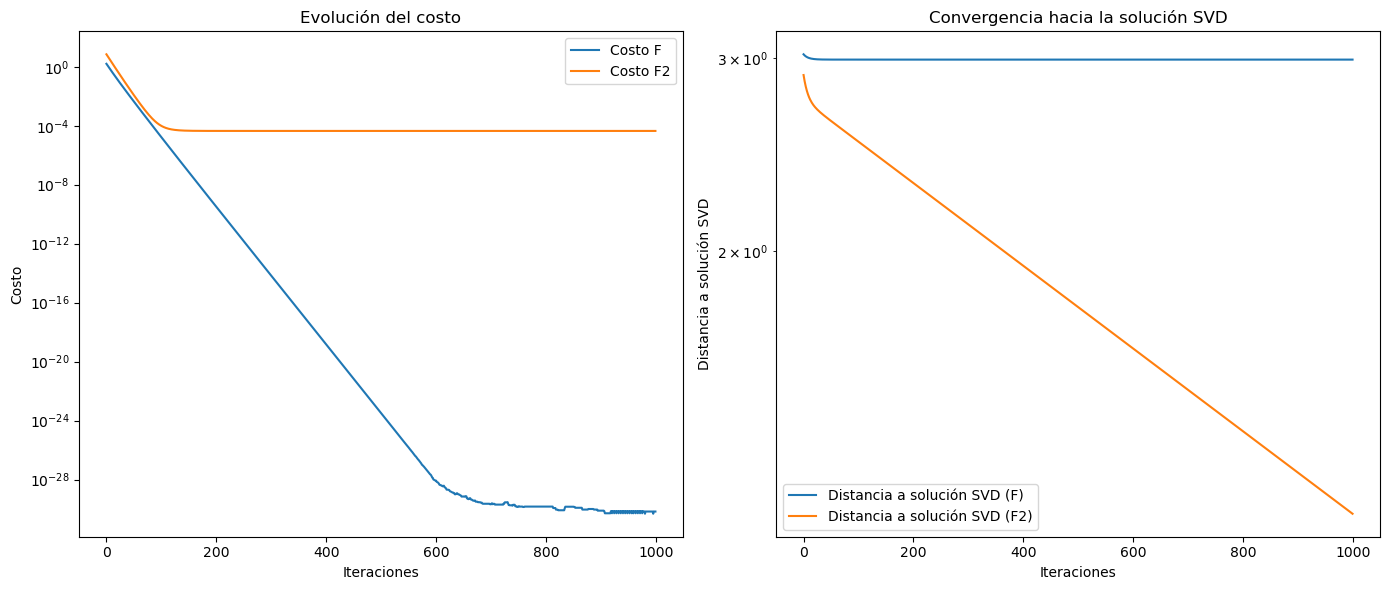


Valor de s (alpha) utilizado: (0.003797948055080571+0j)
El valor de s se elige como 1 / λ_max para garantizar la convergencia y la estabilidad del algoritmo. Si el valor de s es demasiado grande, el algoritmo puede divergir; si es demasiado pequeño, la convergencia será muy lenta.


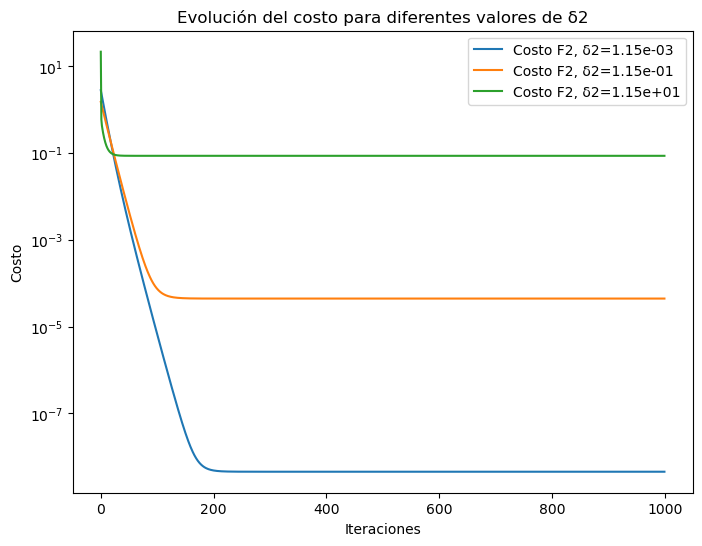

Análisis de la variación de δ2:
Cuando se varían los valores de δ2, se observa que un δ2 más pequeño induce una solución menos regularizada, mientras que un δ2 más grande induce una mayor regularización en la solución. Esto se refleja en la evolución del costo y la convergencia del algoritmo.


In [20]:
import matplotlib.pyplot as plt

# Graficar la evolución del costo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.semilogy(cost_history_F, label='Costo F')
plt.semilogy(cost_history_F2, label='Costo F2')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.title('Evolución del costo')

plt.subplot(1, 2, 2)
plt.semilogy(np.linalg.norm(np.array(x_history_F) - x_svd, axis=1), label='Distancia a solución SVD (F)')
plt.semilogy(np.linalg.norm(np.array(x_history_F2) - x_svd, axis=1), label='Distancia a solución SVD (F2)')
plt.xlabel('Iteraciones')
plt.ylabel('Distancia a solución SVD')
plt.legend()
plt.title('Convergencia hacia la solución SVD')

plt.tight_layout()
plt.show()

# Análisis
print(f"\nValor de s (alpha) utilizado: {alpha}")
print("El valor de s se elige como 1 / λ_max para garantizar la convergencia y la estabilidad del algoritmo. "
      "Si el valor de s es demasiado grande, el algoritmo puede divergir; si es demasiado pequeño, "
      "la convergencia será muy lenta.")

# Variación de δ2
delta2_values = [10**(-4) * sigma_max, 10**(-2) * sigma_max, 10**(0) * sigma_max]
cost_histories = []

for delta2 in delta2_values:
    _, cost_history_F2_varied, _ = gradient_descent(A, b, alpha, num_iterations, regularization='L2', delta2=delta2)
    cost_histories.append(cost_history_F2_varied)

plt.figure(figsize=(8, 6))
for i, delta2 in enumerate(delta2_values):
    plt.semilogy(cost_histories[i], label=f'Costo F2, δ2={delta2:.2e}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.title('Evolución del costo para diferentes valores de δ2')
plt.show()

print("Análisis de la variación de δ2:")
print("Cuando se varían los valores de δ2, se observa que un δ2 más pequeño induce una solución menos regularizada, "
      "mientras que un δ2 más grande induce una mayor regularización en la solución. "
      "Esto se refleja en la evolución del costo y la convergencia del algoritmo.")